## Composite stratigraphic section for the Berkeley Hills

This notebook plots a stratigraphic section of the Berkeley Hills at Highway 24 using the package "pystrat"  by Yuem Park.

The thickness of each formation was determined through a combination of methods and data sources. The Great Valley Group basement complex was approximated using Graymer, 2000 map data and trigonometry. In Graymer's map the Great Valley Group is faulted into the Sobrante Formation. We did not follow this interpretation to determine stratigraphic thickness and instead referred to Caldecott Tunnel data (Page, 1950; Geotechnical Baseline Report, 2009). Based on these data the Great Valley Group is not interpreted to be faulted into the Sobrante Fm. The thickness of the Sobrante Fm and Claremont Fm was entirely approximated using Caldecott Tunnel bore hole data. These thicknesses are uncertain as there is tight folding within the Claremont Formation. The Orinda Fm was estimated using a combination of Caldecott Tunnel bore hole data and measured sections beginning 4 meters above the fourth tunnel entrance on the eastern side. The Moraga Fm was measured from the contact with the Orinda Fm until the 10 meter Moraga Tuff. The rest of the Moraga Fm, as well as the Siesta Fm and Bald Peak Fm were approximated using trigonometry calculations. 

## Install pystrat
If you do not have pystrat installed, running the code cell below will install it:

In [1]:
!pip install pystrat

## Import pystrat and other scientific python packages

In [2]:
# standard modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# pystrat
from pystrat import pystrat

## Plot Stratigraphic Section and Geochronology Samples

In [3]:
# read in your lithostratigraphy data
litho = pd.read_csv('../data/pystrat/lithostratigraphy.csv')

# read in your styling files
color_style = pd.read_csv('../data/pystrat/color-style.csv')
width_style = pd.read_csv('../data/pystrat/width-style.csv')

geochron = pd.read_csv('../data/pystrat/geochronology.csv')

In [4]:
geochron

,SAMPLE_NAME,SAMPLE_HEIGHT,X_PLOT,SAMPLE_AGE,SAMPLE_AGE_2SIGMA
0,CSUF-4,681.77,1.0,NaN,NaN
1,JG-BH5,1331.53,1.0,NaN,NaN
2,OR24-2,1732.01,1.9,NaN,NaN
3,OR24-1,1733.21,1.0,NaN,NaN
4,MV24-1,1784.91,1.0,NaN,NaN
5,MT24-1,1894.36,1.0,NaN,NaN
6,EBH15/BHR-1,1894.36,1.9,NaN,NaN
7,SFM-1,2182.24,1.0,NaN,NaN


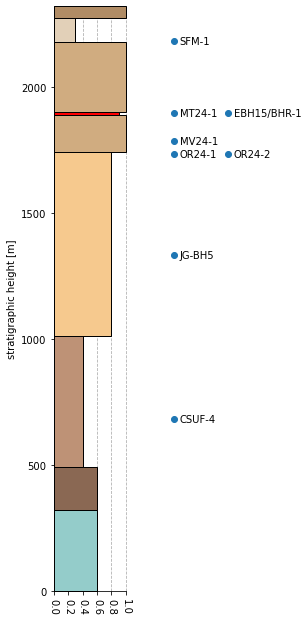

In [5]:
# create a pystrat Section from the lithostratigraphy data
section_01 = pystrat.Section(litho['THICKNESS'], litho['FACIES'])

# create a pystrat Style from the styling files
style_01 = pystrat.Style('facies',color_style['COLOR'],color_style[['r','g','b']]/255,
                         'facies',width_style['FACIES'],width_style['width'],
                         0.0035, 1)

# plot the Section using the Style
fig, ax = pystrat.plot_stratigraphy(section_01, style_01, ncols=2)

ax[1].scatter(geochron['X_PLOT'],geochron['SAMPLE_HEIGHT'])
ax[1].axis('off')
ax[1].set_xlim(0.8,2)

for i, label in enumerate(geochron['SAMPLE_NAME']):
    plt.text(geochron['X_PLOT'][i]+0.1, geochron['SAMPLE_HEIGHT'][i],label,verticalalignment='center')

plt.savefig('./Output/composite_strat.pdf')
plt.show(fig)

stratigraphic height scaling : 1 distance unit = 1 inch * 0.0035
width value of 1 will be     : 1 inches


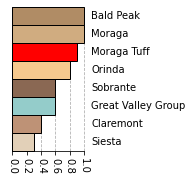

In [6]:
fig, ax = style_01.plot_legend()

plt.show(fig)